In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import json
import unidecode

# Implementation of final table in a function

With getCleanDataframe we obtain a cleaned dataframe with the time-dependant attributes of stations using as input the json file.
The attributes are:
<ul>
    <li>reservations_count</li>
     <li>light</li>
     <li>free_bases</li>
     <li>no_available</li>
     <li>dock_bikes</li>
</ul>

The output dataframe has as indexes: [id, attributeName] and dates as columns 

In [10]:
filePath = "Bicimad_Stations_201905.json"
def getCleanDataframe(filePath):
    df = getRawDataFrame(filePath)
    df = dateFormatting(df)
    table = rawDatatoTable(df)
    return finalDataFrame(table)

def getRawDataFrame(filePath):
    df = pd.read_json(filePath, orient='records', lines=True, encoding="ISO 8859-1")
    return df

def dateFormatting(df):
    df['_id']= pd.to_datetime(df['_id'], format='%Y-%m-%dT%H:%M:%S') 
    return df

def rawDatatoTable(df):    
    newDf=df.explode('stations')
    indexes= newDf['stations'].apply(lambda x: x['id'])
    table = pd.pivot_table(newDf, values='stations',index=['_id'],
                        columns=indexes, aggfunc=np.sum)
    return table

def chooseData(x, y): 
    
    if type(x)==dict:
      
        return x[y]
    else:
        return float('NaN')
    
def finalDataFrame(table):
    Reservation = table.applymap(lambda x: chooseData(x, 'reservations_count'))
    Light = table.applymap(lambda x: chooseData(x, 'light'))
    FreeBases = table.applymap(lambda x: chooseData(x, 'free_bases'))
    no_available = table.applymap(lambda x: chooseData(x, 'no_available'))
    DockBikes = table.applymap(lambda x: chooseData(x, 'dock_bikes'))

    Reservation= Reservation.T
    Light = Light.T
    FreeBases= FreeBases.T
    no_available= no_available.T
    DockBikes= DockBikes.T

    Reservation['Name'] ='reservations_count'
    Light['Name'] ='light'
    FreeBases['Name'] ='free_bases'
    no_available['Name'] ='no_available'
    DockBikes['Name'] ='dock_bikes'
    finalDf = pd.concat([Reservation, Light, FreeBases, no_available, DockBikes],  names=['_id', 'Name'])
    finalDf = finalDf.reset_index().set_index(['stations', 'Name'])
    return finalDf



# Examples

In [11]:
filePath = "Bicimad_Stations_201905.json"
df = getCleanDataframe(filePath)
df.head()

,_id,2019-05-01 00:20:28.426371,2019-05-01 01:20:29.224701,2019-05-01 02:20:31.066888,2019-05-01 03:20:34.080013,2019-05-01 04:20:40.213306,2019-05-01 05:20:37.997387,2019-05-01 06:20:39.427560,2019-05-01 07:20:40.877776,2019-05-01 08:20:41.811106,2019-05-01 09:20:43.120482,...,2019-05-31 14:26:59.749062,2019-05-31 15:27:00.393671,2019-05-31 16:27:02.140513,2019-05-31 17:27:04.580259,2019-05-31 18:27:07.767111,2019-05-31 19:27:08.364623,2019-05-31 20:27:09.667673,2019-05-31 21:27:11.094009,2019-05-31 22:27:12.831525,2019-05-31 23:27:14.487222
stations,Name,,,,,,,,,,,,,,,,,,,,,
1,reservations_count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,reservations_count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,reservations_count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,reservations_count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,reservations_count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [12]:
df.loc[57, 'free_bases']

_id
2019-05-01 00:20:28.426371     7.0
2019-05-01 01:20:29.224701    13.0
2019-05-01 02:20:31.066888    13.0
2019-05-01 03:20:34.080013    14.0
2019-05-01 04:20:40.213306    15.0
                              ... 
2019-05-31 19:27:08.364623     0.0
2019-05-31 20:27:09.667673     1.0
2019-05-31 21:27:11.094009     5.0
2019-05-31 22:27:12.831525     3.0
2019-05-31 23:27:14.487222     1.0
Name: (57, free_bases), Length: 735, dtype: float64

# Clean punctuations

In [2]:
reading_file = open("Bicimad_Stations_201905.json", "r")

new_file_content = ""
for line in reading_file:
    stripped_line = line.strip()
    new_line = unidecode.unidecode(stripped_line)   
    new_file_content += new_line +"\n"

reading_file.close()
writing_file = open("NewBicimad.json", "w")
writing_file.write(new_file_content)
writing_file.close()

# Read json file

In [54]:
df = pd.read_json("NewBicimad.json", orient='records', lines=True)

In [6]:
df.head()

,_id,stations
0,2019-05-01T00:20:28.426371,"[{'activate': 1, 'name': 'Puerta del Sol A', '..."
1,2019-05-01T01:20:29.224701,"[{'activate': 1, 'name': 'Puerta del Sol A', '..."
2,2019-05-01T02:20:31.066888,"[{'activate': 1, 'name': 'Puerta del Sol A', '..."
3,2019-05-01T03:20:34.080013,"[{'activate': 1, 'name': 'Puerta del Sol A', '..."
4,2019-05-01T04:20:40.213306,"[{'activate': 1, 'name': 'Puerta del Sol A', '..."


In [7]:
df['stations'].iloc[0][21]

{'activate': 1,
 'name': 'Red de San Luis A',
 'reservations_count': 0,
 'light': 3,
 'total_bases': 24,
 'free_bases': 0,
 'number': '21a',
 'longitude': '-3.7014814',
 'no_available': 1,
 'address': 'Calle Montera no 48',
 'latitude': '40.4197872',
 'dock_bikes': 0,
 'id': 23}

# Date formatting and set as index

In [55]:
df['_id']= pd.to_datetime(df['_id'], format='%Y-%m-%dT%H:%M:%S')  
#df=df.set_index(['_id'])

print(df.shape)
df.head()

(735, 2)


,_id,stations
0,2019-05-01 00:20:28.426371,"[{'activate': 1, 'name': 'Puerta del Sol A', '..."
1,2019-05-01 01:20:29.224701,"[{'activate': 1, 'name': 'Puerta del Sol A', '..."
2,2019-05-01 02:20:31.066888,"[{'activate': 1, 'name': 'Puerta del Sol A', '..."
3,2019-05-01 03:20:34.080013,"[{'activate': 1, 'name': 'Puerta del Sol A', '..."
4,2019-05-01 04:20:40.213306,"[{'activate': 1, 'name': 'Puerta del Sol A', '..."


# Make table with data
date x Id_station

In [56]:
a=df.explode('stations')

index1= a['stations'].apply(lambda x: x['id'])
table = pd.pivot_table(a, values='stations',index=['_id'],
                        columns=index1, aggfunc=np.sum)

# Clean constant data

In json file, time-dependant columns are:
<ul>
    <li>reservations_count</li>
     <li>light</li>
     <li>free_bases</li>
     <li>no_available</li>
     <li>dock_bikes</li>
</ul>

We will make a table with only those variables.

In [57]:
def chooseData(x, y): 
    
    if type(x)==dict:
      
        return x[y]
    else:
        return float('NaN')

In [59]:
Reservation = table.applymap(lambda x: chooseData(x, 'reservations_count'))
Light = table.applymap(lambda x: chooseData(x, 'light'))
FreeBases = table.applymap(lambda x: chooseData(x, 'free_bases'))
no_available = table.applymap(lambda x: chooseData(x, 'no_available'))
DockBikes = table.applymap(lambda x: chooseData(x, 'dock_bikes'))

In [60]:
Reservation= Reservation.T
Light = Light.T
FreeBases= FreeBases.T
no_available= no_available.T
DockBikes= DockBikes.T

Reservation['Name'] ='reservations_count'
Light['Name'] ='Light'
FreeBases['Name'] ='FreeBases'
no_available['Name'] ='no_available'
DockBikes['Name'] ='DockBikes'

In [61]:
Prueba = pd.concat([Reservation, Light, FreeBases, no_available, DockBikes],  names=['_id', 'Name'])

In [62]:

Test = Prueba.reset_index().set_index(['stations', 'Name'])
Test.head()

,_id,2019-05-01 00:20:28.426371,2019-05-01 01:20:29.224701,2019-05-01 02:20:31.066888,2019-05-01 03:20:34.080013,2019-05-01 04:20:40.213306,2019-05-01 05:20:37.997387,2019-05-01 06:20:39.427560,2019-05-01 07:20:40.877776,2019-05-01 08:20:41.811106,2019-05-01 09:20:43.120482,...,2019-05-31 14:26:59.749062,2019-05-31 15:27:00.393671,2019-05-31 16:27:02.140513,2019-05-31 17:27:04.580259,2019-05-31 18:27:07.767111,2019-05-31 19:27:08.364623,2019-05-31 20:27:09.667673,2019-05-31 21:27:11.094009,2019-05-31 22:27:12.831525,2019-05-31 23:27:14.487222
stations,Name,,,,,,,,,,,,,,,,,,,,,
1,reservations_count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,reservations_count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,reservations_count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,reservations_count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,reservations_count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [63]:
Test.loc[1, 'FreeBases']

_id
2019-05-01 00:20:28.426371    12.0
2019-05-01 01:20:29.224701    14.0
2019-05-01 02:20:31.066888    19.0
2019-05-01 03:20:34.080013    17.0
2019-05-01 04:20:40.213306    20.0
                              ... 
2019-05-31 19:27:08.364623     0.0
2019-05-31 20:27:09.667673     0.0
2019-05-31 21:27:11.094009     0.0
2019-05-31 22:27:12.831525     0.0
2019-05-31 23:27:14.487222     1.0
Name: (1, FreeBases), Length: 735, dtype: float64

# Implementation of final table in a function

In [65]:
filePath = "Bicimad_Stations_201905.json"

def getRawDataFrame(filePath):
    reading_file = open("Bicimad_Stations_201905.json", "r")

    new_file_content = ""
    for line in reading_file:
        stripped_line = line.strip()
        new_line = unidecode.unidecode(stripped_line)   
        new_file_content += new_line +"\n"

    reading_file.close()
    writing_file = open(newFilePath, "w")
    writing_file.write(new_file_content)
    writing_file.close()
    df = pd.read_json("NewBicimad.json", orient='records', lines=True)
    return df

def dateFormatting(df):
    df['_id']= pd.to_datetime(df['_id'], format='%Y-%m-%dT%H:%M:%S') 
    return df

def rawDatatoTable(df):    
    newDf=df.explode('stations')
    indexes= newDf['stations'].apply(lambda x: x['id'])
    table = pd.pivot_table(newDf, values='stations',index=['_id'],
                        columns=indexes, aggfunc=np.sum)
    return table

def chooseData(x, y): 
    
    if type(x)==dict:
      
        return x[y]
    else:
        return float('NaN')
    
def finalDataFrame(table):
    Reservation = table.applymap(lambda x: chooseData(x, 'reservations_count'))
    Light = table.applymap(lambda x: chooseData(x, 'light'))
    FreeBases = table.applymap(lambda x: chooseData(x, 'free_bases'))
    no_available = table.applymap(lambda x: chooseData(x, 'no_available'))
    DockBikes = table.applymap(lambda x: chooseData(x, 'dock_bikes'))

    Reservation= Reservation.T
    Light = Light.T
    FreeBases= FreeBases.T
    no_available= no_available.T
    DockBikes= DockBikes.T

    Reservation['Name'] ='reservations_count'
    Light['Name'] ='Light'
    FreeBases['Name'] ='FreeBases'
    no_available['Name'] ='no_available'
    DockBikes['Name'] ='DockBikes'
    finalDf = pd.concat([Reservation, Light, FreeBases, no_available, DockBikes],  names=['_id', 'Name'])
    finalDf = finalDf.reset_index().set_index(['stations', 'Name'])
    return finalDf

def getCleanDataframe(filePath):
    df = getRawDataFrame(filePath)
    df = dateFormatting(df)
    table = rawDatatoTable(df)
    return finalDataFrame(table)

In [66]:
df = getCleanDataframe(filePath)

In [68]:
df.shape

(870, 735)

<Figure size 216x288 with 0 Axes>

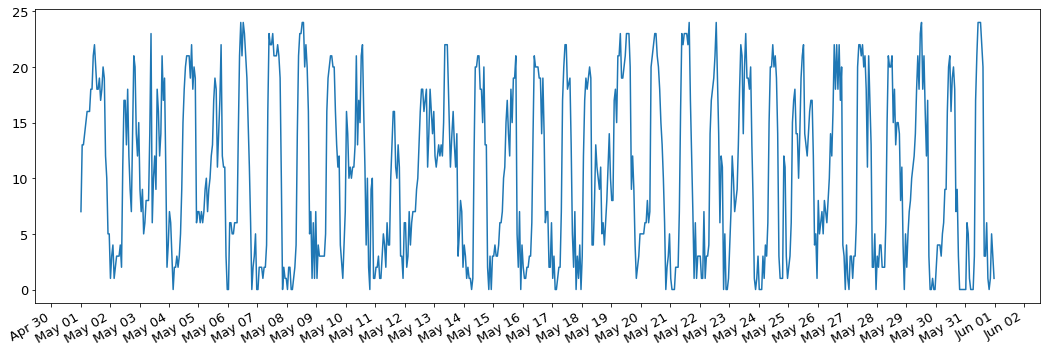

In [9]:
import matplotlib.dates as mdates
from matplotlib.pyplot import figure
pt.figure(figsize=(3,4))
fig, ax = pt.subplots(figsize=(18, 6))
pt.plot(FreeBases[57])
# pt.plot(DockBikes[57])
#pt.plot(DockBikes[57]+FreeBases[117])
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.tick_params(labelsize=13)
# pt.tight_layout()     

#pt.gcf().subplots_adjust(bottom=0.15)
fig.autofmt_xdate()